In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/TIME SERIES RIDGE REGRESSION/dataset.csv")
print(train.shape)
train.head()

Mounted at /content/drive
(325, 2)


,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [3]:
df=pd.DataFrame()

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TIME SERIES RIDGE REGRESSION/dataset.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'



In [4]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


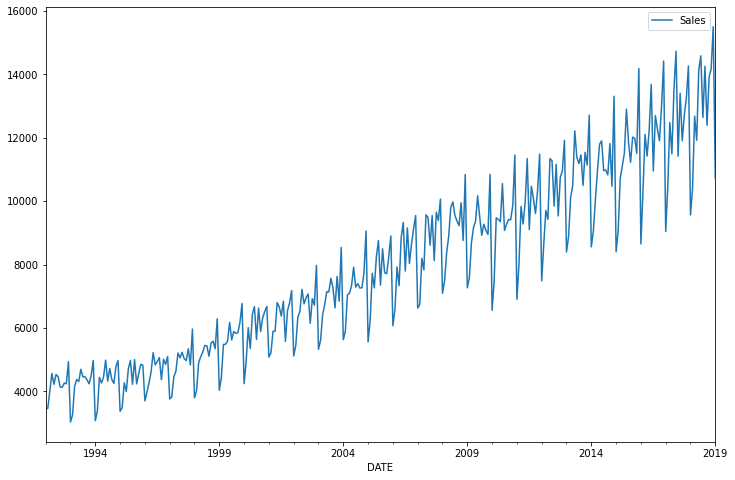

In [5]:
df.columns = ['Sales']
df.plot(figsize=(12,8))

In [6]:
df['Sale_LastMonth']=df['Sales'].shift(+1)
df['Sale_2Monthsback']=df['Sales'].shift(+2)
df['Sale_3Monthsback']=df['Sales'].shift(+3)
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [7]:
df=df.dropna()
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [8]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
import numpy as np

In [9]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [10]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

In [11]:


X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]



In [13]:
model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Ridge()

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))

In [19]:
print('Mean Squared Error for Ridge Model is:',rmse_rf)

Mean Squared Error for Ridge Model is: 1913.7762399350665


In [21]:
# model = RideRegression for PREDICTION & MAPE
yhat = ridge_model.predict(X_test)
model.fit(X_train,y_train)
model.fit(X_train,y_train)

print('Prediction: ', yhat)
print('MAPE: ',model.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Prediction:  [[11827.38475528]
 [12429.62369088]
 [11791.52722345]
 [12074.34983079]
 [12343.48904117]
 [13079.54295067]
 [11402.58071057]
 [11270.45486685]
 [10810.70139395]
 [11254.70018392]
 [12545.65208077]
 [13201.55699108]
 [12655.70647578]
 [13154.28727618]
 [11928.878697  ]
 [12557.27299098]
 [12513.06506311]
 [13311.56168357]
 [11668.38035284]
 [11320.13548936]
 [11048.93370886]
 [11472.09230264]
 [12956.3876985 ]
 [13397.71591722]
 [13333.200347  ]
 [13744.64863359]
 [12699.60492889]
 [13443.98563776]
 [13318.08546137]
 [14412.26144335]]
MAPE:  -0.49733183925734026


In [22]:
# define model
model = Ridge(alpha=1.0)

In [23]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(ridge_model, final_x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# force scores to be positive
scores = absolute(scores)
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 832.220 (130.411)


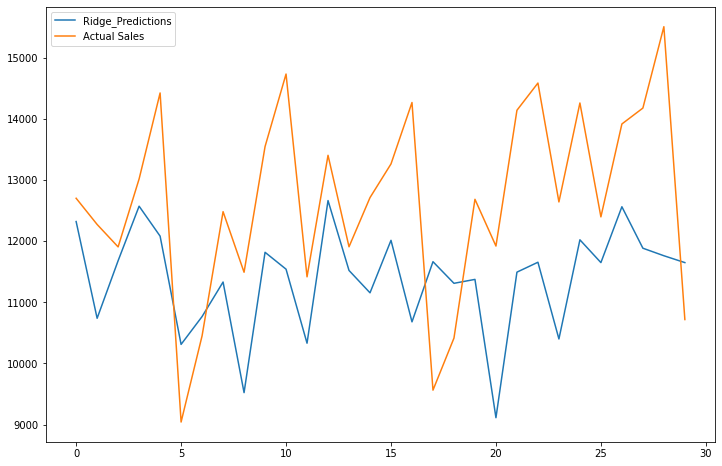

In [16]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Ridge_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()